# Libraries

All the functions are implement in ```coutour_extraction_functions.py``` file.

In [1]:
from functions import *
import pandas as pd

# Download dataset

In [2]:
# download_and_extract_gdrive_zip("1bRG21aGbC4XdxqVw5fLAnI2WYJyRNNXp")

# Get contours

In [3]:
_ = process_images_to_json('dataset/binary-masks', 'dataset_contours_aggregate', 'dataset//binary_patchs')

Contours by file extracted and saved to dataset_contours_aggregate_by_image.json
Contours cropped and saved to dataset//binary_patchs.
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.json
Contours by file extracted and saved to dataset_contours_aggregate_by_patch.csv with 7039 samples.


# Plot one sample of the dataset

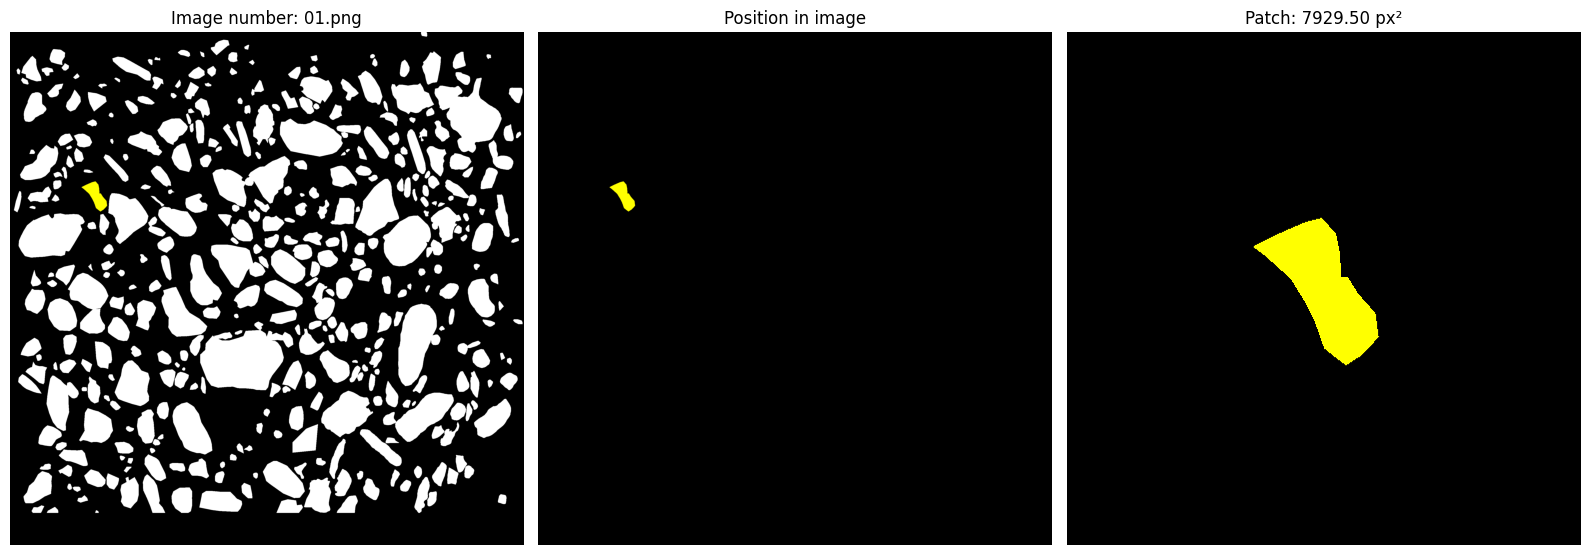

In [4]:
plot_contours_from_json("dataset_contours_aggregate_by_image.json", keys_to_plot=["01.png"]) 

# Filter contours

In [5]:
filter_images_by_diameter(threshold_diam_mm=15.0)


Images with diameter < 15.0 mm copied to: dataset/binary_patchs_filtered
Total images copied: 7038
Total images removed (>= 15.0 mm): 1
Filtered CSV saved to: dataset_contours_aggregate_by_patch_filtered.csv
Filtered contours JSON saved to: dataset_contours_aggregate_by_patch_filtered.json


In [6]:
print("\nVerificando contornos multipolígonos...")
multipolys = find_multipolygon_contours("dataset_contours_aggregate_by_patch_filtered.json")
print("Total de contornos multipolígonos encontrados:", len(multipolys))


Verificando contornos multipolígonos...
[MultiPolygon] 01_66.png
[MultiPolygon] 03_7.png
[MultiPolygon] 03_44.png
[MultiPolygon] 03_63.png
[MultiPolygon] 03_71.png
[MultiPolygon] 03_507.png
[MultiPolygon] 07_329.png
[MultiPolygon] 08_35.png
[MultiPolygon] 08_63.png
[MultiPolygon] 08_255.png
[MultiPolygon] 09_22.png
[MultiPolygon] 10_129.png
[MultiPolygon] 13_41.png
[MultiPolygon] 13_135.png
[MultiPolygon] 14_107.png
[MultiPolygon] 15_13.png
[MultiPolygon] 15_444.png
[MultiPolygon] 16_158.png
[MultiPolygon] 16_183.png
[MultiPolygon] 17_269.png
Total de contornos multipolígonos encontrados: 20


In [7]:
purge_images_everywhere(
    csv_path="dataset_contours_aggregate_by_patch_filtered.csv",
    json_path="dataset_contours_aggregate_by_patch_filtered.json",  # fonte de verdade
    image_dir="dataset/binary_patchs_filtered",
    delete_list=multipolys,   # lista
    verbose=True
)

Purge concluído:
 - Linhas removidas do CSV: 20
 - Entradas removidas do JSON: 20
 - Arquivos removidos do diretório: 20


{'csv_rows_removed': 20, 'json_entries_removed': 20, 'files_removed': 20}

# Statistics

In [8]:
df = pd.read_csv("dataset_contours_aggregate_by_patch_filtered.csv")
df.head()

,image_name,area (px),area (mm2),diameter (px),diameter (mm)
0,01_0.png,144.0,0.12960,18.384977,0.551549
1,01_1.png,1020.0,0.91800,55.927624,1.677829
2,01_2.png,1445.0,1.30050,65.551704,1.966551
3,01_3.png,6132.5,5.51925,130.816864,3.924506
4,01_4.png,5463.0,4.91670,123.988098,3.719643


In [9]:
df.describe()

,area (px),area (mm2),diameter (px),diameter (mm)
count,7018.000000,7018.000000,7018.000000,7018.000000
mean,4382.377102,3.944139,87.109546,2.613286
std,7068.105163,6.361295,61.871005,1.856130
min,0.000000,0.000000,3.162478,0.094874
25%,857.500000,0.771750,44.654427,1.339633
50%,1884.750000,1.696275,68.505676,2.055170
75%,4532.875000,4.079587,106.815460,3.204464
max,96149.000000,86.534100,486.319031,14.589571


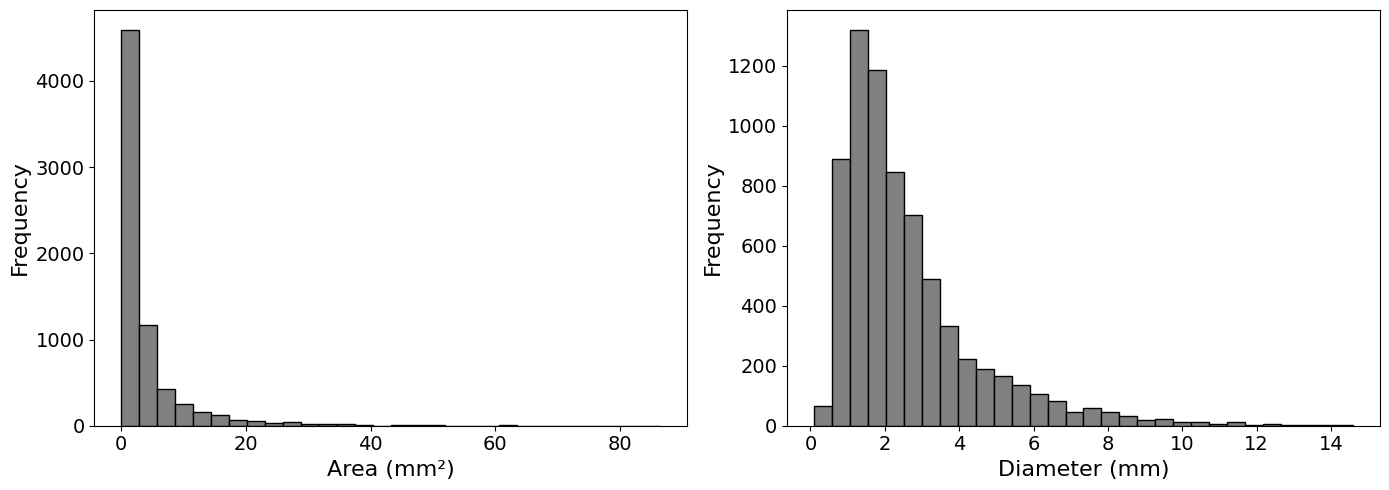

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['area (mm2)'], bins=30, color='gray', edgecolor='black')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].hist(df['diameter (mm)'], bins=30, color='gray', edgecolor='black')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('frequency_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

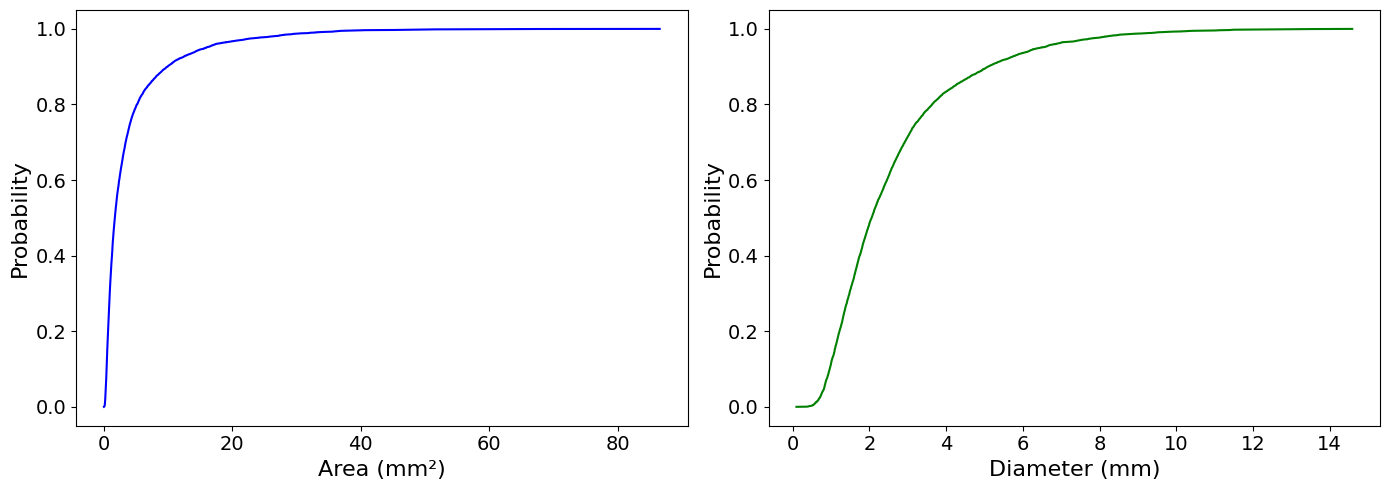

In [11]:
area_sorted, area_cdf = obtain_cdf(list(df['area (mm2)']))
diameter_sorted, diameter_cdf = obtain_cdf(list(df['diameter (mm)']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(area_sorted, area_cdf, color='blue')
axes[0].set_xlabel("Area (mm²)", fontsize=16)
axes[0].set_ylabel("Probability", fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

axes[1].plot(diameter_sorted, diameter_cdf, color='green')
axes[1].set_xlabel("Diameter (mm)", fontsize=16)
axes[1].set_ylabel("Probability", fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig('Probability_area.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()